In [1]:
import matplotlib.pyplot as plt
import csv

import numpy as np

import pandas as pd

import glob
import os

import read_config_utils as cu



In [2]:


include_diagonal_fit = True
#include_diagonal_fit = False

include_ibu = True
#include_ibu = False




ibu_dir_suffix = ''



try :
    plots_dir = 'paper-plots'
    os.mkdir( plots_dir )
    print(' Making output directory for plots : %s' % plots_dir )
except :
    print(' Output dir for plots already exists: %s' % plots_dir )


smearing_vals = [ 0.0000, 0.1184, 0.2368, 0.3553, 0.5132, 0.7500 ]

n_smearings = len(smearing_vals)

input_files_ibu = []
input_dirs_unbinned = []
samples_input_dirs = []

for si in range( n_smearings ) :

    input_files_ibu.append( 'fit_results%s/fit_results_%6.4f-v1b.csv' % (ibu_dir_suffix, smearing_vals[si]) )

    input_dirs_unbinned.append( 'output-run-kde-study-1d-read-input-v0a-smearing-%6.4f' % smearing_vals[si] )

    print('\n\n')
    print(' input_file_ibu : %s ' % input_files_ibu[si] )

    if not os.path.exists( input_files_ibu[si] ) :
        print('\n\n *** missing!\n\n')
        exit()
    
        
    print(' input_dir_unbinned : %s ' % input_dirs_unbinned[si] )

    if not os.path.exists( input_dirs_unbinned[si] ) :
        print('\n\n *** missing!\n\n')
        exit()

    tmp_sid = cu.get_par( '%s/config.txt' % input_dirs_unbinned[0], 'input_dir' )
    print(' tmp_sid 1 : %s' % tmp_sid )

    samples_input_dirs.append( tmp_sid )

    print(' Input directory for samples: %s' % samples_input_dirs[si])

    true_mu   = float(cu.get_par( '%s/config.txt' % samples_input_dirs[si], 'mu_true'))
    true_sig2 = float(cu.get_par( '%s/config.txt' % samples_input_dirs[si], 'var_true'))

    print('\n True values:  mu = %6.4f,  sig2 = %6.4f\n' % (true_mu, true_sig2))

print('\n\n')



 Output dir for plots already exists: paper-plots



 input_file_ibu : fit_results/fit_results_0.0000-v1b.csv 
 input_dir_unbinned : output-run-kde-study-1d-read-input-v0a-smearing-0.0000 
 tmp_sid 1 : input-samples/input-samples-smearing-0.0000-v1b
 Input directory for samples: input-samples/input-samples-smearing-0.0000-v1b

 True values:  mu = 0.2000,  sig2 = 0.8100




 input_file_ibu : fit_results/fit_results_0.1184-v1b.csv 
 input_dir_unbinned : output-run-kde-study-1d-read-input-v0a-smearing-0.1184 
 tmp_sid 1 : input-samples/input-samples-smearing-0.0000-v1b
 Input directory for samples: input-samples/input-samples-smearing-0.0000-v1b

 True values:  mu = 0.2000,  sig2 = 0.8100




 input_file_ibu : fit_results/fit_results_0.2368-v1b.csv 
 input_dir_unbinned : output-run-kde-study-1d-read-input-v0a-smearing-0.2368 
 tmp_sid 1 : input-samples/input-samples-smearing-0.0000-v1b
 Input directory for samples: input-samples/input-samples-smearing-0.0000-v1b

 True values:  mu = 0.200

In [3]:
ubuf_chi2_fit_mu_val = []
ubuf_chi2_fit_sig2_val = []
ubuf_chi2_fit_mu_err = []
ubuf_chi2_fit_sig2_err = []

ubuf_chi2_fit_diag_mu_val = []
ubuf_chi2_fit_diag_sig2_val = []
ubuf_chi2_fit_diag_mu_err = []
ubuf_chi2_fit_diag_sig2_err = []


#-- new
ubuf_ml_fit_mu_val = []
ubuf_ml_fit_mu_err = []
ubuf_ml_fit_sig2_val = []
ubuf_ml_fit_sig2_err = []


print('\n\n Loading unbinned unfolding results.\n')

for si in range( n_smearings ) :
    
    infile = '%s/chi2-fit-results.npy' % input_dirs_unbinned[si]
    print('%s' % infile )

    with open( infile, 'rb' ) as f :
        ubuf_chi2_fit_mu_val.append(np.load(f))
        ubuf_chi2_fit_sig2_val.append(np.load(f))
        ubuf_chi2_fit_mu_err.append(np.load(f))
        ubuf_chi2_fit_sig2_err.append(np.load(f))
        ubuf_chi2_fit_diag_mu_val.append(np.load(f))
        ubuf_chi2_fit_diag_sig2_val.append(np.load(f))
        ubuf_chi2_fit_diag_mu_err.append(np.load(f))
        ubuf_chi2_fit_diag_sig2_err.append(np.load(f))
        
    infile = '%s/fit-results.npy' % input_dirs_unbinned[si]
    print('%s' % infile )
    
    with open( infile, 'rb' ) as f :
        ubuf_ml_fit_mu_val.append( np.load(f)[0] )
        ubuf_ml_fit_mu_err.append( np.load(f)[0] )
        ubuf_ml_fit_sig2_val.append( np.load(f)[0,0] )
        ubuf_ml_fit_sig2_err.append( np.load(f)[0,0] )




 Loading unbinned unfolding results.

output-run-kde-study-1d-read-input-v0a-smearing-0.0000/chi2-fit-results.npy
output-run-kde-study-1d-read-input-v0a-smearing-0.0000/fit-results.npy
output-run-kde-study-1d-read-input-v0a-smearing-0.1184/chi2-fit-results.npy
output-run-kde-study-1d-read-input-v0a-smearing-0.1184/fit-results.npy
output-run-kde-study-1d-read-input-v0a-smearing-0.2368/chi2-fit-results.npy
output-run-kde-study-1d-read-input-v0a-smearing-0.2368/fit-results.npy
output-run-kde-study-1d-read-input-v0a-smearing-0.3553/chi2-fit-results.npy
output-run-kde-study-1d-read-input-v0a-smearing-0.3553/fit-results.npy
output-run-kde-study-1d-read-input-v0a-smearing-0.5132/chi2-fit-results.npy
output-run-kde-study-1d-read-input-v0a-smearing-0.5132/fit-results.npy
output-run-kde-study-1d-read-input-v0a-smearing-0.7500/chi2-fit-results.npy
output-run-kde-study-1d-read-input-v0a-smearing-0.7500/fit-results.npy


In [4]:
ubuf_ml_fit_mu_val[0].shape

(500,)

In [5]:
ubuf_ml_fit_sig2_val[0].shape

(500,)

In [6]:
ubuf_chi2_fit_mu_val[0].shape

(500,)

<function matplotlib.pyplot.show(close=None, block=None)>

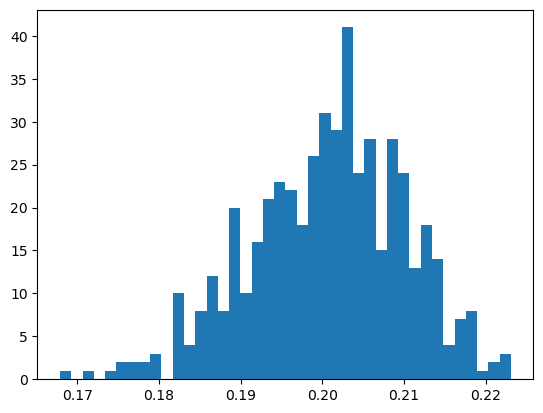

In [7]:
plt.hist( ubuf_chi2_fit_mu_val[0], bins=40 )
plt.show

In [8]:

ibu_df = []

print('\n Reading IBU fit results.\n')

for si in range( n_smearings ) :
    
    print( '%s' % input_files_ibu[si] )


    ibu_df.append( pd.read_csv( input_files_ibu[si] ) )
    


 Reading IBU fit results.

fit_results/fit_results_0.0000-v1b.csv
fit_results/fit_results_0.1184-v1b.csv
fit_results/fit_results_0.2368-v1b.csv
fit_results/fit_results_0.3553-v1b.csv
fit_results/fit_results_0.5132-v1b.csv
fit_results/fit_results_0.7500-v1b.csv


In [9]:
ibu_df[0]

,Parameter,Value,Error_Lower,Error_Upper,Fit_Type,Bootstrap_Index
0,A,10050.808432,97.588603,97.698387,cov,0
1,mu,0.180002,0.009523,0.009585,cov,0
2,var,0.809445,0.010478,0.010433,cov,0
3,A,10038.736441,99.343924,99.368008,cov_diag,0
4,mu,0.180750,0.008998,0.009015,cov_diag,0
...,...,...,...,...,...,...
2995,mu,0.197458,0.009598,0.009593,cov,499
2996,var,0.797773,0.010501,0.010514,cov,499
2997,A,9972.100432,99.398790,99.313921,cov_diag,499
2998,mu,0.197274,0.009055,0.009070,cov_diag,499


In [10]:
ibu_np = []

for si in range( n_smearings ) :

    ibu_np.append( ibu_df[si].to_numpy() )
    
    

In [11]:
ibu_np[0]

array([['A', 10050.808431527874, 97.58860306098994, 97.69838722553736,
        'cov', 0],
       ['mu', 0.1800022438480804, 0.0095234535996667, 0.0095854379766712,
        'cov', 0],
       ['var', 0.8094447732397048, 0.0104781815824428,
        0.0104326094411483, 'cov', 0],
       ...,
       ['A', 9972.100432122616, 99.3987896159497, 99.31392126074452,
        'cov_diag', 499],
       ['mu', 0.1972742280718131, 0.0090551380009667, 0.0090703755416527,
        'cov_diag', 499],
       ['var', 0.7956073711656676, 0.0116435927618636,
        0.0116818875040868, 'cov_diag', 499]], dtype=object)

In [12]:
ibu_chi2_fit_mu_val = []
ibu_chi2_fit_sig2_val = []
ibu_chi2_fit_mu_err = []
ibu_chi2_fit_sig2_err = []

ibu_chi2_fit_diag_mu_val = []
ibu_chi2_fit_diag_sig2_val = []
ibu_chi2_fit_diag_mu_err = []
ibu_chi2_fit_diag_sig2_err = []

for si in range( n_smearings ) :

    ibu_chi2_fit_mu_val.append( np.array(ibu_np[si][:,1][(ibu_np[si][:,0] == 'mu') & (ibu_np[si][:,4] == 'cov')], dtype=float ) )
    ibu_chi2_fit_sig2_val.append(  np.array(ibu_np[si][:,1][(ibu_np[si][:,0] == 'var') & (ibu_np[si][:,4] == 'cov')], dtype=float) )
    ibu_chi2_fit_mu_err.append(  np.array(ibu_np[si][:,2][(ibu_np[si][:,0] == 'mu') & (ibu_np[si][:,4] == 'cov')], dtype=float) )
    ibu_chi2_fit_sig2_err.append(  np.array(ibu_np[si][:,2][(ibu_np[si][:,0] == 'var') & (ibu_np[si][:,4] == 'cov')], dtype=float) )

    ibu_chi2_fit_diag_mu_val.append(  np.array(ibu_np[si][:,1][(ibu_np[si][:,0] == 'mu') & (ibu_np[si][:,4] == 'cov_diag')], dtype=float) )
    ibu_chi2_fit_diag_sig2_val.append(  np.array(ibu_np[si][:,1][(ibu_np[si][:,0] == 'var') & (ibu_np[si][:,4] == 'cov_diag')], dtype=float) )
    ibu_chi2_fit_diag_mu_err.append(  np.array(ibu_np[si][:,2][(ibu_np[si][:,0] == 'mu') & (ibu_np[si][:,4] == 'cov_diag')], dtype=float) )
    ibu_chi2_fit_diag_sig2_err.append( np.array(ibu_np[si][:,2][(ibu_np[si][:,0] == 'var') & (ibu_np[si][:,4] == 'cov_diag')], dtype=float) )



In [13]:
ibu_chi2_fit_mu_val[0].shape

(500,)

In [14]:
n_samples = len(ibu_chi2_fit_mu_val[0])

## Apply some cleaning to data to remove bad fits/unfolding

In [15]:

sample_is_good = []

for si in range( n_smearings ) :

    sample_is_good.append( np.full( (n_samples), True ) )

    for ssi in range( n_samples ) :
        if np.isnan( ibu_chi2_fit_mu_err[si][ssi] ) :
            print('  Smearing %d, Sample %4d is bad.' % (si,ssi) )
            sample_is_good[si][ssi] = False
            
            

In [16]:
ibu_chi2_fit_mu_err[0]

array([0.00952345, 0.00948248, 0.00970548, 0.00960095, 0.00944745,
       0.00974418, 0.00948814, 0.00957511, 0.00960457, 0.009368  ,
       0.00960212, 0.00953664, 0.0097029 , 0.00955405, 0.00961686,
       0.00948484, 0.0095493 , 0.00960615, 0.00942478, 0.00963565,
       0.0095542 , 0.00936864, 0.0096576 , 0.0096056 , 0.00962973,
       0.00957184, 0.00939278, 0.00948884, 0.00970709, 0.00951917,
       0.00924372, 0.00963602, 0.00965924, 0.00970316, 0.00971575,
       0.00949253, 0.00956671, 0.00956224, 0.00963536, 0.00954072,
       0.0097158 , 0.00961461, 0.00959503, 0.00958317, 0.00941935,
       0.00965594, 0.00971537, 0.00960859, 0.0094505 , 0.00959441,
       0.00960074, 0.00958967, 0.00950206, 0.00962599, 0.00980467,
       0.00955661, 0.00960704, 0.00950687, 0.00953531, 0.00949782,
       0.00962645, 0.00965112, 0.00956209, 0.00957147, 0.00957599,
       0.00964927, 0.00944726, 0.00948158, 0.0094623 , 0.00949085,
       0.00960483, 0.0097151 , 0.00958406, 0.00963626, 0.00957

In [17]:
sample_is_good[0]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [18]:


ub_val_mu = np.zeros( n_smearings )
ub_err_mu = np.zeros( n_smearings )
ub_rms_mu = np.zeros( n_smearings )
ub_val_sig2 = np.zeros( n_smearings )
ub_err_sig2 = np.zeros( n_smearings )
ub_rms_sig2 = np.zeros( n_smearings )

ub_diag_val_mu = np.zeros( n_smearings )
ub_diag_err_mu = np.zeros( n_smearings )
ub_diag_rms_mu = np.zeros( n_smearings )
ub_diag_val_sig2 = np.zeros( n_smearings )
ub_diag_err_sig2 = np.zeros( n_smearings )
ub_diag_rms_sig2 = np.zeros( n_smearings )


ibu_val_mu = np.zeros( n_smearings )
ibu_err_mu = np.zeros( n_smearings )
ibu_rms_mu = np.zeros( n_smearings )
ibu_val_sig2 = np.zeros( n_smearings )
ibu_err_sig2 = np.zeros( n_smearings )
ibu_rms_sig2 = np.zeros( n_smearings )

#-- new
ub_ml_val_mu = np.zeros( n_smearings )
ub_ml_err_mu = np.zeros( n_smearings )
ub_ml_rms_mu = np.zeros( n_smearings )
ub_ml_val_sig2 = np.zeros( n_smearings )
ub_ml_err_sig2 = np.zeros( n_smearings )
ub_ml_rms_sig2 = np.zeros( n_smearings )


for si in range( n_smearings ) :
    

    rms_mu_ubuf = np.sqrt( np.cov(ubuf_chi2_fit_mu_val[si][sample_is_good[si]]) )
    rms_sig2_ubuf = np.sqrt( np.cov(ubuf_chi2_fit_sig2_val[si][sample_is_good[si]]) )

    ave_fit_err_mu_ubuf   = np.mean( ubuf_chi2_fit_mu_err[si][sample_is_good[si]] )
    ave_fit_err_sig2_ubuf = np.mean( ubuf_chi2_fit_sig2_err[si][sample_is_good[si]] )

    mean_mu_ubuf = np.mean( ubuf_chi2_fit_mu_val[si][sample_is_good[si]] )
    mean_sig2_ubuf = np.mean( ubuf_chi2_fit_sig2_val[si][sample_is_good[si]] )
    
   


    rms_mu_ubuf_diag = np.sqrt( np.cov(ubuf_chi2_fit_diag_mu_val[si][sample_is_good[si]]) )
    rms_sig2_ubuf_diag = np.sqrt( np.cov(ubuf_chi2_fit_diag_sig2_val[si][sample_is_good[si]]) )

    ave_fit_err_mu_ubuf_diag   = np.mean( ubuf_chi2_fit_diag_mu_err[si][sample_is_good[si]] )
    ave_fit_err_sig2_ubuf_diag = np.mean( ubuf_chi2_fit_diag_sig2_err[si][sample_is_good[si]] )

    mean_mu_ubuf_diag = np.mean( ubuf_chi2_fit_diag_mu_val[si][sample_is_good[si]] )
    mean_sig2_ubuf_diag = np.mean( ubuf_chi2_fit_diag_sig2_val[si][sample_is_good[si]] )
    
    
      
    
    rms_mu_ubuf_ml = np.sqrt( np.cov(ubuf_ml_fit_mu_val[si][sample_is_good[si]]) )
    rms_sig2_ubuf_ml = np.sqrt( np.cov(ubuf_ml_fit_sig2_val[si][sample_is_good[si]]) )

    ave_fit_err_mu_ubuf_ml   = np.mean( ubuf_ml_fit_mu_err[si][sample_is_good[si]] )
    ave_fit_err_sig2_ubuf_ml = np.mean( ubuf_ml_fit_sig2_err[si][sample_is_good[si]] )    

    mean_mu_ubuf_ml = np.mean( ubuf_ml_fit_mu_val[si][sample_is_good[si]] )
    mean_sig2_ubuf_ml = np.mean( ubuf_ml_fit_sig2_val[si][sample_is_good[si]] )


    
    
    
    #rms_mu_ibu  = np.sqrt( np.cov(ibu_chi2_fit_mu_val) )  # why does this not work!!!

    x = ibu_chi2_fit_mu_val[si][sample_is_good[si]]
    rms_mu_ibu = np.sqrt( np.mean(x*x) - np.mean(x)*np.mean(x) )
    mean_mu_ibu = np.mean(x)
    x = ibu_chi2_fit_sig2_val[si][sample_is_good[si]]
    rms_sig2_ibu = np.sqrt( np.mean(x*x) - np.mean(x)*np.mean(x) )
    mean_sig2_ibu = np.mean(x)

    ave_fit_err_mu_ibu   = np.mean( ibu_chi2_fit_mu_err[si][sample_is_good[si]] )
    ave_fit_err_sig2_ibu = np.mean( ibu_chi2_fit_sig2_err[si][sample_is_good[si]] )
     
    
    
    ub_val_mu[si] = mean_mu_ubuf
    ub_err_mu[si] = ave_fit_err_mu_ubuf
    ub_rms_mu[si] = rms_mu_ubuf
    
    ub_val_sig2[si] = mean_sig2_ubuf
    ub_err_sig2[si] = ave_fit_err_sig2_ubuf
    ub_rms_sig2[si] = rms_sig2_ubuf    


    
    ub_diag_val_mu[si] = mean_mu_ubuf_diag
    ub_diag_err_mu[si] = ave_fit_err_mu_ubuf_diag
    ub_diag_rms_mu[si] = rms_mu_ubuf_diag
    
    ub_diag_val_sig2[si] = mean_sig2_ubuf_diag
    ub_diag_err_sig2[si] = ave_fit_err_sig2_ubuf_diag
    ub_diag_rms_sig2[si] = rms_sig2_ubuf_diag 
    
    
    
    
    ub_ml_val_mu[si] = mean_mu_ubuf_ml
    ub_ml_err_mu[si] = ave_fit_err_mu_ubuf_ml
    ub_ml_rms_mu[si] = rms_mu_ubuf_ml
    
    ub_ml_val_sig2[si] = mean_sig2_ubuf_ml
    ub_ml_err_sig2[si] = ave_fit_err_sig2_ubuf_ml
    ub_ml_rms_sig2[si] = rms_sig2_ubuf_ml

   
    
    
    ibu_val_mu[si] = mean_mu_ibu
    ibu_err_mu[si] = ave_fit_err_mu_ibu
    ibu_rms_mu[si] = rms_mu_ibu
    
    ibu_val_sig2[si] = mean_sig2_ibu
    ibu_err_sig2[si] = ave_fit_err_sig2_ibu
    ibu_rms_sig2[si] = rms_sig2_ibu


    print('\n\n')
    
    print(' =========== Smearing %6.4f' % smearing_vals[si])

    print('  Unbinned unfolding,         mu value mean %8.4f, RMS: %8.4f, ave fit err %6.4f' % 
          (mean_mu_ubuf, rms_mu_ubuf, ave_fit_err_mu_ubuf) )
    print('  Unbinned unfolding, diag.   mu value mean %8.4f, RMS: %8.4f, ave fit err %6.4f' % 
          (mean_mu_ubuf_diag, rms_mu_ubuf_diag, ave_fit_err_mu_ubuf_diag) )
    print('  Unbinned unf. ML fit,       mu value mean %8.4f, RMS: %8.4f, ave fit err %6.4f' % (mean_mu_ubuf_ml, rms_mu_ubuf_ml, ave_fit_err_mu_ubuf_ml) )
    print('  IBU,                        mu value mean %8.4f, RMS: %8.4f, ave fit err %6.4f' % (mean_mu_ibu, rms_mu_ibu, ave_fit_err_mu_ibu) )

    print('\n')
    print('  Unbinned unfolding,       sig2 value mean %8.4f, RMS: %8.4f, ave fit err %6.4f' % 
          ( mean_sig2_ubuf, rms_sig2_ubuf, ave_fit_err_sig2_ubuf) )
    print('  Unbinned unfolding, diag. sig2 value mean %8.4f, RMS: %8.4f, ave fit err %6.4f' % 
          ( mean_sig2_ubuf_diag, rms_sig2_ubuf_diag, ave_fit_err_sig2_ubuf_diag) )
    print('  Unbinned unf. ML  ,       sig2 value mean %8.4f, RMS: %8.4f, ave fit err %6.4f' % ( mean_sig2_ubuf_ml, rms_sig2_ubuf_ml, ave_fit_err_sig2_ubuf_ml) )
    print('  IBU,                      sig2 value mean %8.4f, RMS: %8.4f, ave fit err %6.4f' % ( mean_sig2_ubuf, rms_sig2_ibu, ave_fit_err_sig2_ibu) )
  




print('\n\n')







 =========== Smearing 0.0000
  Unbinned unfolding,         mu value mean   0.2006, RMS:   0.0095, ave fit err 0.0095
  Unbinned unfolding, diag.   mu value mean   0.2005, RMS:   0.0096, ave fit err 0.0087
  Unbinned unf. ML fit,       mu value mean   0.2003, RMS:   0.0095, ave fit err 0.0090
  IBU,                        mu value mean   0.2002, RMS:   0.0096, ave fit err 0.0096


  Unbinned unfolding,       sig2 value mean   0.8105, RMS:   0.0105, ave fit err 0.0106
  Unbinned unfolding, diag. sig2 value mean   0.8106, RMS:   0.0107, ave fit err 0.0114
  Unbinned unf. ML  ,       sig2 value mean   0.8106, RMS:   0.0106, ave fit err 0.0114
  IBU,                      sig2 value mean   0.8105, RMS:   0.0105, ave fit err 0.0105



 =========== Smearing 0.1184
  Unbinned unfolding,         mu value mean   0.2005, RMS:   0.0095, ave fit err 0.0095
  Unbinned unfolding, diag.   mu value mean   0.2004, RMS:   0.0095, ave fit err 0.0098
  Unbinned unf. ML fit,       mu value mean   0.2002, 

In [19]:
true_mu_plus_rms_ub = true_mu +  ub_ml_rms_mu
true_mu_minus_rms_ub = true_mu -  ub_ml_rms_mu

true_sig2_plus_rms_ub = true_sig2 +  ub_ml_rms_sig2
true_sig2_minus_rms_ub = true_sig2 -  ub_ml_rms_sig2





 Saving as paper-plots/uncertainty-and-bias-vs-resolution-ibu-diag.pdf




<function matplotlib.pyplot.show(close=None, block=None)>

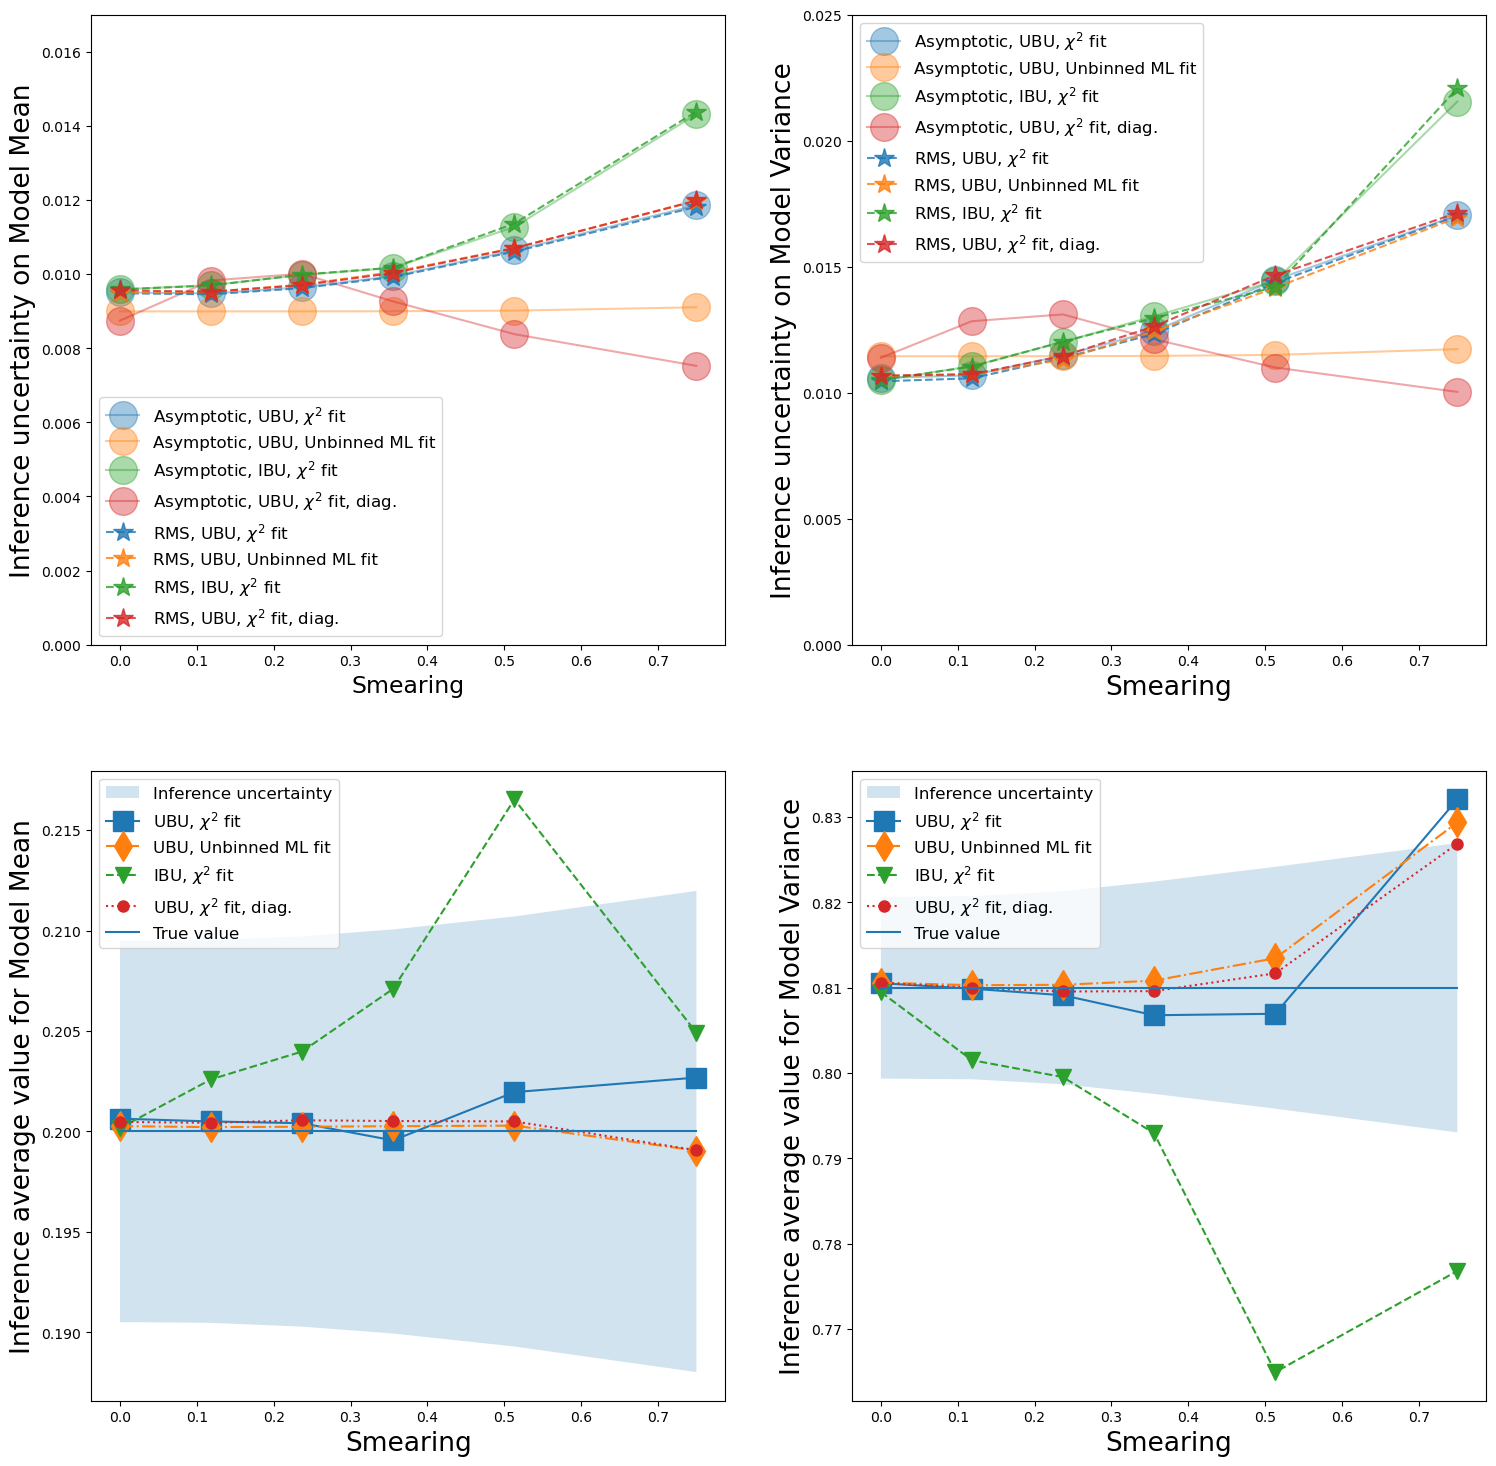

In [20]:
fig,ax = plt.subplots( 2, 2, figsize=(2*9,2*9))

a1=0.4
a2=0.8
ms1 = 20
ms2 = 15

axi = ax[0,0]

axi.plot( smearing_vals, ub_err_mu, 
         marker='o', markersize=ms1, color='tab:blue', 
         alpha=a1,
         label='Asymptotic, UBU, $\chi^2$ fit' )


axi.plot( smearing_vals, ub_ml_err_mu, 
         marker='o', markersize=ms1, color='tab:orange',
         alpha=a1,
         label='Asymptotic, UBU, Unbinned ML fit' )

if include_ibu :
    axi.plot( smearing_vals, ibu_err_mu, 
             marker='o', markersize=ms1, color='tab:green',
             alpha=a1,
             label='Asymptotic, IBU, $\chi^2$ fit' )

if include_diagonal_fit :
    axi.plot( smearing_vals, ub_diag_err_mu, 
         marker='o', markersize=ms1, color='tab:red', 
         alpha=a1,
         label='Asymptotic, UBU, $\chi^2$ fit, diag.' )



axi.plot( smearing_vals, ub_rms_mu, 
         marker='*', markersize=ms2, linestyle='dashed', color='tab:blue',
         alpha=a2,
         label='RMS, UBU, $\chi^2$ fit')

axi.plot( smearing_vals, ub_ml_rms_mu, 
         marker='*', markersize=ms2, linestyle='dashed', color='tab:orange',
         alpha=a2,
         label='RMS, UBU, Unbinned ML fit' )

if include_ibu:
    axi.plot( smearing_vals, ibu_rms_mu, 
             marker='*', markersize=ms2, linestyle='dashed', color='tab:green', 
             alpha=a2,
             label='RMS, IBU, $\chi^2$ fit' )

if include_diagonal_fit :
    axi.plot( smearing_vals, ub_diag_rms_mu, 
         marker='*', markersize=ms2, linestyle='dashed', color='tab:red',
         alpha=a2,
         label='RMS, UBU, $\chi^2$ fit, diag.')

    


axi.set_xlabel('Smearing', fontsize=17 )
axi.set_ylabel('Inference uncertainty on Model Mean', fontsize=19 )
axi.legend( fontsize=12 )

axi.set_ylim((0.000,0.017))


#---


axi = ax[0,1]

axi.plot( smearing_vals, ub_err_sig2, 
         marker='o', markersize=ms1, color='tab:blue', 
         alpha=a1,
         label='Asymptotic, UBU, $\chi^2$ fit' )


axi.plot( smearing_vals, ub_ml_err_sig2, 
         marker='o', markersize=ms1, color='tab:orange',
         alpha=a1,
         label='Asymptotic, UBU, Unbinned ML fit' )

if include_ibu:
    axi.plot( smearing_vals, ibu_err_sig2, 
             marker='o', markersize=ms1, color='tab:green',
             alpha=a1,
             label='Asymptotic, IBU, $\chi^2$ fit' )

if include_diagonal_fit :
    axi.plot( smearing_vals, ub_diag_err_sig2, 
         marker='o', markersize=ms1, color='tab:red', 
         alpha=a1,
         label='Asymptotic, UBU, $\chi^2$ fit, diag.' )



axi.plot( smearing_vals, ub_rms_sig2, 
         marker='*', markersize=ms2, linestyle='dashed', color='tab:blue',
         alpha=a2,
         label='RMS, UBU, $\chi^2$ fit')


axi.plot( smearing_vals, ub_ml_rms_sig2, 
         marker='*', markersize=ms2, linestyle='dashed', color='tab:orange',
         alpha=a2,
         label='RMS, UBU, Unbinned ML fit' )

if include_ibu:
    axi.plot( smearing_vals, ibu_rms_sig2, 
             marker='*', markersize=ms2, linestyle='dashed', color='tab:green', 
             alpha=a2,
             label='RMS, IBU, $\chi^2$ fit' )

if include_diagonal_fit :
    axi.plot( smearing_vals, ub_diag_rms_sig2, 
         marker='*', markersize=ms2, linestyle='dashed', color='tab:red',
         alpha=a2,
         label='RMS, UBU, $\chi^2$ fit, diag.')

 

axi.set_xlabel('Smearing', fontsize=19 )
axi.set_ylabel('Inference uncertainty on Model Variance', fontsize=19 )
axi.legend( fontsize=12 )

axi.set_ylim((0.000,0.025))







#-----------------------

axi = ax[1,0]

axi.fill_between( smearing_vals, true_mu_minus_rms_ub, true_mu_plus_rms_ub, alpha=0.2, label='Inference uncertainty' )

axi.plot( smearing_vals, ub_val_mu, 
         marker='s',  markersize=15, linestyle='solid', color='tab:blue', 
         label='UBU, $\chi^2$ fit' )


axi.plot( smearing_vals, ub_ml_val_mu, 
         marker='d',  markersize=15, linestyle='dashdot', color='tab:orange',
         label='UBU, Unbinned ML fit' )

if include_ibu:
    axi.plot( smearing_vals, ibu_val_mu, 
             marker='v', markersize=12, linestyle='dashed', color='tab:green',
             label='IBU, $\chi^2$ fit' )


if include_diagonal_fit :
    axi.plot( smearing_vals, ub_diag_val_mu, 
         marker='o',  markersize=8, linestyle='dotted', color='tab:red',
         label='UBU, $\chi^2$ fit, diag.' )

    

axi.plot( smearing_vals, true_mu*np.ones( n_smearings),
         label='True value'
        )


axi.set_ylabel('Inference average value for Model Mean', fontsize=19 )
axi.set_xlabel('Smearing', fontsize=19 )
axi.legend( fontsize=12 )


#---


axi = ax[1,1]

axi.fill_between( smearing_vals, true_sig2_minus_rms_ub, true_sig2_plus_rms_ub, alpha=0.2, label='Inference uncertainty' )


axi.plot( smearing_vals, ub_val_sig2, 
         marker='s',  markersize=15, linestyle='solid', color='tab:blue', 
         label='UBU, $\chi^2$ fit' )


axi.plot( smearing_vals, ub_ml_val_sig2, 
         marker='d',  markersize=15, linestyle='dashdot', color='tab:orange',
         label='UBU, Unbinned ML fit' )

if include_ibu :
    axi.plot( smearing_vals, ibu_val_sig2, 
             marker='v', markersize=12, linestyle='dashed', color='tab:green',
             label='IBU, $\chi^2$ fit' )


if include_diagonal_fit :
    axi.plot( smearing_vals, ub_diag_val_sig2, 
         marker='o',  markersize=8, linestyle='dotted', color='tab:red',
         label='UBU, $\chi^2$ fit, diag.' )

axi.plot( smearing_vals, true_sig2*np.ones( n_smearings),
         label='True value'
        )



axi.set_ylabel('Inference average value for Model Variance', fontsize=19 )
axi.set_xlabel('Smearing', fontsize=19 )
axi.legend( fontsize=12 )

ibu_str = ''
if include_ibu : ibu_str = '-ibu'

diag_str = ''
if include_diagonal_fit : diag_str = '-diag'

fname = '%s/uncertainty-and-bias-vs-resolution%s%s.pdf' % (plots_dir, ibu_str, diag_str)

print('\n\n Saving as %s\n\n' % fname )

plt.savefig( fname, bbox_inches='tight')

plt.show